# Analysis of the small annotated corpus

Analysis of the annotated corpus.  
  
We look for the following metrics:
- courts
- decision months
- number of sentences
- number of subsumtions
- number of definitions
- average length of judgments in sentences
- propostion definition/subsumption to judgment 

In [1]:
import json
import os
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from collections import Counter

Go through every judgement and get the data.

In [2]:
path = 'thesis_corpus/'

num_sentences = []
num_definition = []
num_subsumption = []
num_other = []
courts = []
month = []
year = []

for file in os.listdir(path):
    with open(path+file, encoding='utf-8') as f:
        data = json.load(f)
    
    file_definiton = 0
    file_subsumption = 0
    file_other = 0
    
    courts.append(data['meta']['court'])
    
    year.append(data['meta']['date'][6:])
    month.append(data['meta']['date'][3:5])
    
    for paragraph in data['decision_text']['decision_reasons']:
        for sentence in paragraph:
            if sentence[1] == 'definition':
                file_definiton += 1
            if sentence[1] == 'subsumption':
                file_subsumption += 1
            if sentence[1] == 'other':
                file_other += 1               
    file_sentences = file_definiton + file_subsumption + file_other
    
    num_sentences.append(file_sentences)
    num_subsumption.append(file_subsumption)
    num_definition.append(file_definiton)
    num_other.append(file_other) 

In [7]:
print('Number all sentences: ' + str(sum(num_sentences)))
print('Number all definitions: ' + str(sum(num_definition)))
print('Number all subsumptions: ' + str(sum(num_subsumption)))
print('Number all other: ' + str(sum(num_other)))

Number all sentences: 25198
Number all definitions: 5331
Number all subsumptions: 13386
Number all other: 6481


In [59]:
print('percent definitions: ' + str((sum(num_definition)/sum(num_sentences))*100))
print('percent subsumptions: ' + str((sum(num_subsumption)/sum(num_sentences))*100))
print('percent other: ' + str((sum(num_other)/sum(num_sentences))*100))

percent definitions: 21.156440987379952
percent subsumptions: 53.12326375109136
percent other: 25.72029526152869


In [3]:
# make pandas dataframe from all this data

judgment_names = data.keys()

base_data = {'Definition':num_definition, 'Subsumption':num_subsumption, 'Other':num_other, 'Length':num_sentences}
df = pd.DataFrame(base_data)

df.head()

,Definition,Subsumption,Other,Length
0,14,73,34,121
1,12,40,73,125
2,13,28,39,80
3,27,19,22,68
4,25,28,12,65


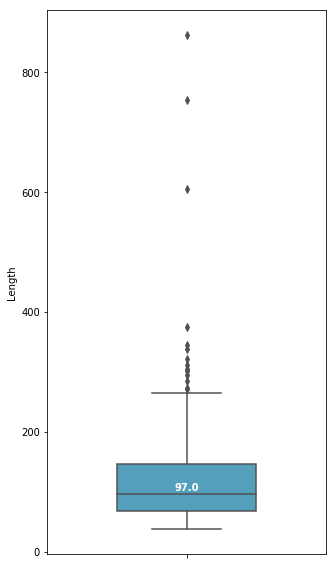

In [10]:
# graphic judgment length

plt.figure(figsize=(5,10))

box_plot = sns.boxplot(y=df['Length'], width=0.5, palette='GnBu_d');
median = df['Length'].median()

vertical_offset = df['Length'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,median + vertical_offset,median, horizontalalignment='center',size='medium',color='w',weight='semibold')
    
# source: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value

In [11]:
# save figure

fig = box_plot.get_figure()
fig.savefig('judgement_length.pdf')

# source: https://stackoverflow.com/questions/32244753/how-to-save-a-seaborn-plot-into-a-file

<Figure size 720x360 with 0 Axes>

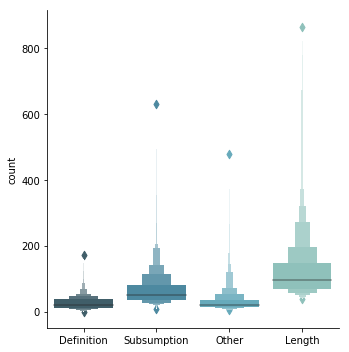

In [18]:
# graphic number of: definition, subsumption, other, sentences

plt.figure(figsize=(10,5))

chart = sns.catplot(data=df, kind='boxen', palette='GnBu_d')
chart.set_axis_labels("", "count")
plt.subplots_adjust(left=0.15)

In [19]:
# save figure

fig = chart.fig
fig.savefig('analysis.pdf')

# source: https://stackoverflow.com/questions/32244753/how-to-save-a-seaborn-plot-into-a-file

In [14]:
# print medians for all lists

defi = statistics.median(num_definition)
subs = statistics.median(num_subsumption)
othe = statistics.median(num_other)

print('Definition median ' + str(defi) + '\n' + 'Subsumption median ' + str(subs) + '\n' + 'Other median ' + str(othe))

Definition median 21.0
Subsumption median 50.0
Other median 21.0


In [16]:
print('least: ' + str(min(num_sentences)))
print('most: ' + str(max(num_sentences)))

least: 38
most: 862


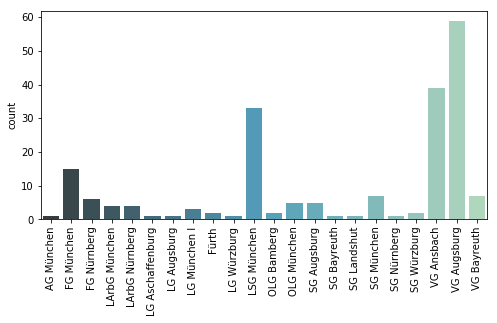

In [86]:
plt.figure(figsize=(8,5))

chart = sns.countplot(x=courts, palette='GnBu_d')
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.30)
fig = chart.get_figure()
fig.savefig('courts.pdf')

In [45]:
print(Counter(courts).most_common())

[('VG Augsburg', 59), ('VG Ansbach', 39), ('LSG München', 33), ('FG München', 15), ('SG München', 7), ('VG Bayreuth', 7), ('FG Nürnberg', 6), ('OLG München', 5), ('SG Augsburg', 5), ('LArbG München', 4), ('LArbG Nürnberg', 4), ('LG München I', 3), ('Fürth', 2), ('OLG Bamberg', 2), ('SG Würzburg', 2), ('AG München', 1), ('LG Aschaffenburg', 1), ('LG Augsburg', 1), ('LG Würzburg', 1), ('SG Bayreuth', 1), ('SG Landshut', 1), ('SG Nürnberg', 1)]


In [87]:
print((59/200)*100)
print((39/200)*100)
print((33/200)*100)

29.5
19.5
16.5


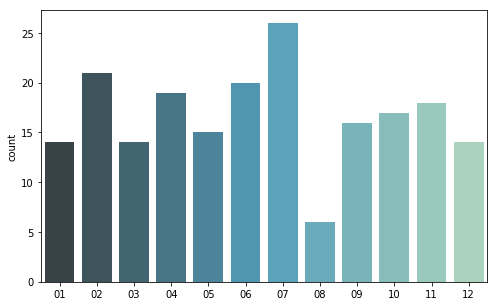

In [78]:
plt.figure(figsize=(8,5))

chart = sns.countplot(x=month, palette='GnBu_d')
fig = chart.get_figure()
fig.savefig('months.pdf')

In [46]:
print(Counter(month).most_common())

[('07', 26), ('02', 21), ('06', 20), ('04', 19), ('11', 18), ('10', 17), ('09', 16), ('05', 15), ('12', 14), ('03', 14), ('01', 14), ('08', 6)]


In [88]:
print((26/200)*100)
print((21/200)*100)
print((20/200)*100)

13.0
10.5
10.0


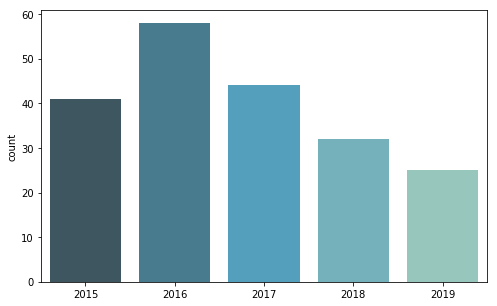

In [20]:
plt.figure(figsize=(8,5))

chart = sns.countplot(x=year, palette='GnBu_d')
fig = chart.get_figure()
fig.savefig('years.pdf')

In [47]:
print(Counter(year).most_common())

[('2016', 58), ('2017', 44), ('2015', 41), ('2018', 32), ('2019', 25)]


In [89]:
print((58/200)*100)
print((44/200)*100)
print((41/200)*100)

28.999999999999996
22.0
20.5
